图论
基于networkx库
1. Graph(): 创建无向图；
2. Graph(A): 由邻接矩阵A创建无向图
3. DiGraph(): 创建有向图
4. DiGraph(A): 由邻接矩阵A创建有向图
5. MultiGraph(): 创建多重无向图
6. MultiDigraph(): 创建多重有向图
7. add_edge(): 添加一条边
8. add_edges_from(List): 从列表中添加多条边
9. add_node(): 添加一个顶点
10. add_nodes_from(List): 添加顶点集合

11. dijkstra_path(G, source, target, weight='weight'):求最短路径
12. dijkstra_path_length(G, source, target, weight='weight'):求最短距离

步骤
1. 创建一个空的图
2. 添加节点
3. 添加边

添加权重标签的步骤
1. 用 nx.draw() 绘制基础图形。 或者用nx.draw_networkx()
2. 用 nx.get_edge_attributes() 提取权重。
3. 用 nx.draw_networkx_edge_labels() 添加权重标签。

[[0. 9. 2. 4. 7.]
 [0. 0. 3. 4. 0.]
 [0. 0. 0. 8. 4.]
 [0. 0. 0. 0. 6.]
 [0. 0. 0. 0. 0.]]


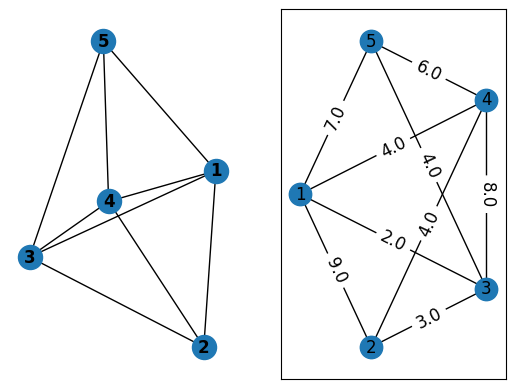

In [2]:
import numpy as np
import networkx as nx
import pylab as plt

a = np.zeros((5,5))
#输入邻接矩阵的上三角元素
a[0, 1:5] = [9,2,4,7]
a[1,2:4] = [3,4]
a[2,[3,4]] = [8,4]
a[3,4] = 6
print(a)

#提取顶点的编号
i, j = np.nonzero(a)  #是使用 NumPy 库来获取数组 a 中所有非零元素的索引
w = a[i,j]  #提出a中的非零元素
edges = list(zip(i,j,w))  #zip(i, j, w) 将 i（顶点1）、j（顶点2）、w（权重）组合成元组 (i, j, w)。

G = nx.Graph()  # 创建一个空的无向图
G.add_weighted_edges_from(edges)  #用于向无向图 G 批量添加带权重的边。它的作用是高效地一次性添加多条边，每条边可以附带一个权重值（如距离、成本、强度等）。
# edges: 一个可迭代对象（如列表），其中每个元素是 (u, v, weight) 格式的元组：
# u 和 v 是边的两个节点（可以是数字、字符串等可哈希对象）。
# weight 是边的权重（通常是数值，如 float 或 int）。
#只会将权重存储在图的边属性中，不会自动在绘制的图中显示权重值。

#自定义节点标签（字典格式）
key = range(5); s = [str(i+1) for i in range(5)]
s = dict(zip(key,s))  #构造用于顶点标注的字符字典

plt.rc('font',size=18)  #用于全局调整图表中的 字体大小。它的作用是让所有文本元素（如标题、坐标轴标签、图例等）默认使用指定的字号（这里是 18）。
plt.subplot(121)
nx.draw(G,font_weight='bold', labels=s)  #nx.draw(G, ...)：绘制图 G 的基本结构（节点和边）。font_weight='bold'：设置节点标签的字体为 粗体（bold）。labels=s：自定义节点标签，s 是一个字典，格式为 {节点: 标签}。

plt.subplot(122); pos=nx.shell_layout(G)  #布局设置 用于生成图节点布局（Node Layout）的函数，它将节点排列成同心圆壳（Concentric Shells）的形式。这种布局适用于展示具有层次结构或分组的网络（如核心-边缘结构、社区结构等）。
nx.draw_networkx(G,pos,node_size=260,labels=s)  #提供了比 nx.draw() 更灵活的参数控制。

w = nx.get_edge_attributes(G,'weight')  #用于提取图中边权重的函数。它会返回一个字典，包含图中所有边的权重值。
"""
功能说明
作用：从图 G 中提取所有边的 'weight' 属性值。
返回值：一个字典，格式为 {(u, v): weight}，其中：
(u, v) 是边的两个节点（如果是无向图，(u, v) 和 (v, u) 视为同一条边）。
weight 是对应的权重值（必须是边属性中名为 'weight' 的值）。
"""
nx.draw_networkx_edge_labels(G,pos,font_size=12,edge_labels=w)  #标注权重
plt.show()
# print(w)

上图的另种写法

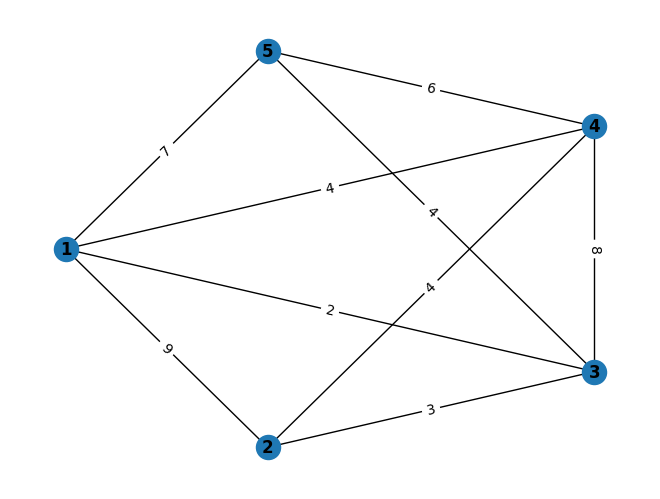

In [4]:
import numpy as np
import networkx as nx
import pylab as plt

List = [(1,2,9),(1,3,2),(1,4,4),(1,5,7),
        (2,3,3),(2,4,4),
        (3,4,8),(3,5,4),
        (4,5,6)]
G = nx.Graph()
G.add_nodes_from(range(1,6))  #添加多个节点
G.add_weighted_edges_from(List)  #添加多条边，并将每条边的权重存储起来
pos=nx.shell_layout(G)
w = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos,with_labels=True,font_weight='bold',font_size=12)
nx.draw_networkx_edge_labels(G,pos,edge_labels=w)  #必须传入节点位置字典 pos
plt.show()

绘制有向图

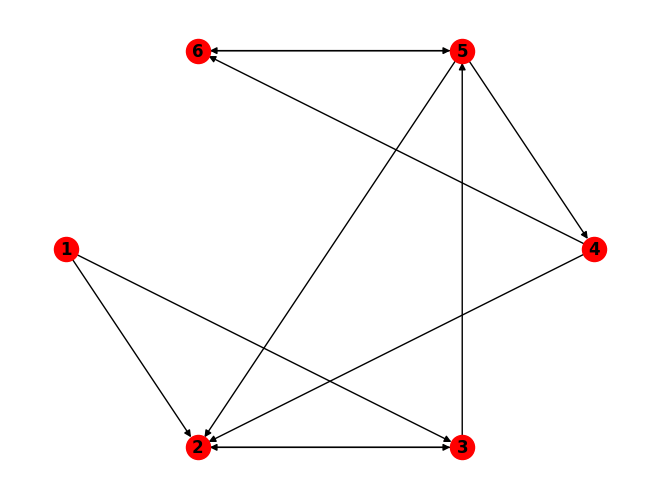

In [6]:
import numpy as np
import networkx as nx
import pylab as plt

G = nx.DiGraph()
List = [(1,2),(1,3),
        (2,3),
        (3,2),(3,5),
        (4,2),(4,6),
        (5,2),(5,4),(5,6),
        (6,5)]
G.add_nodes_from(range(1,7))
G.add_edges_from(List)
plt.rc('font',size=16)
pos = nx.shell_layout(G)
nx.draw(G,pos=pos,with_labels=True,font_weight='bold',node_color='r')
plt.show()